# 시작하기 전
## 참고할 만한 글
* [[Colab] Google Colab (코랩) 환경설정 및 사용법](https://theorydb.github.io/dev/2019/08/23/dev-ml-colab/)
* [Google CoLab으로 머신러닝 공부 편하게 시작하기](https://ndb796.tistory.com/312)

## Upload files

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


## Reading files

In [0]:
import io
import pandas as pd

test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# matplotlib.pyplot
## Pie graph

Text(0, 0.5, '')

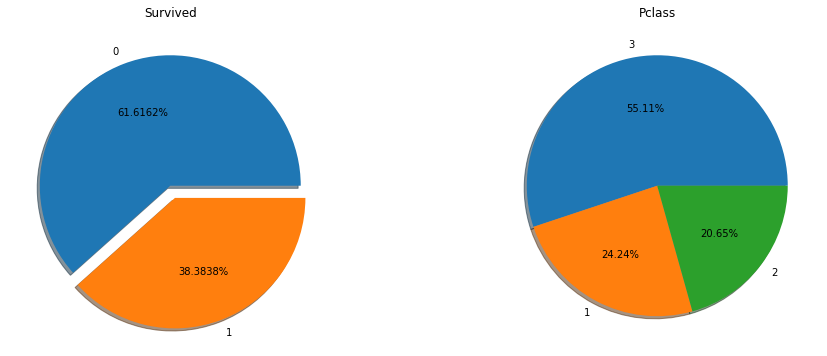

In [0]:
import matplotlib.pyplot as plt
sample=train.copy()

f,ax=plt.subplots(1,2,figsize=(16,6))
# Explode means "protrusion", so if it's 1, it's popping out. 0 and 1 means that the second one is poping out.
# autopercent 4: 소수점 네 번째 자리까지 보여주기
sample['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.4f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sample['Pclass'].value_counts().plot.pie(explode=[0,0.0,0],autopct='%1.2f%%',ax=ax[1],shadow=True)
ax[1].set_title('Pclass')
ax[1].set_ylabel('')

# Missingno
## a chart that shows missing values intuitively

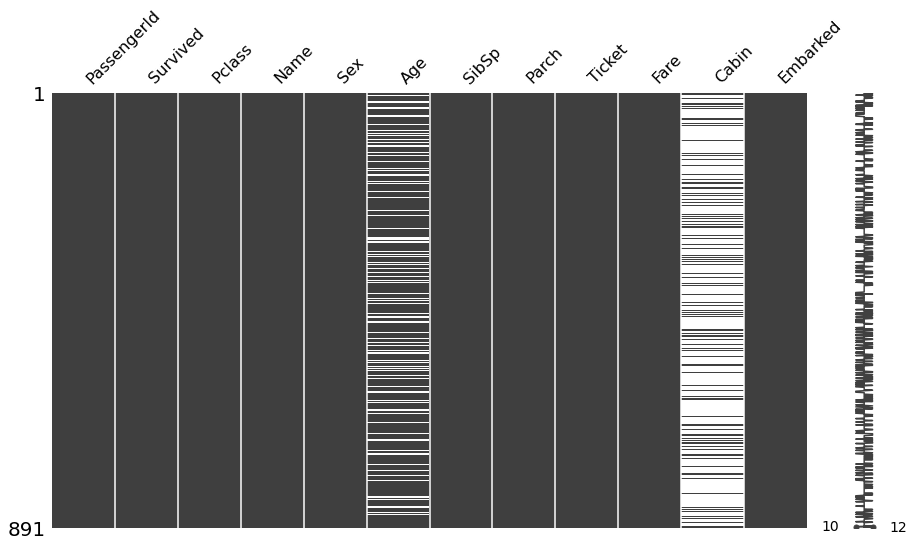

In [0]:
import missingno
missingno.matrix(sample, figsize=(15,8))

# Pandas

In [0]:
import numpy as np

test1=test.copy()
train1=train.copy()

In [0]:
train1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
train1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
train1.describe() #요약된 정보

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train1.info() # show info about data(dtypes, columns,...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train1.shape

(891, 12)

In [0]:
train1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
len(train1)

891

In [0]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train1.columns[3]

'Name'

In [0]:
train1.columns[3:5]

Index(['Name', 'Sex'], dtype='object')

In [0]:
print(train1.shape[0])
print(test1.shape[0])

891
418


In [0]:
train1['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [0]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [0]:
train1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train1.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [0]:
sample=pd.concat((train1,test1),sort=True) # concatenate: 연결하다
sample.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [0]:
# 실수 값을 크기 기준으로 하여 카테고리 값으로 변환
# cut: 실수 값의 경계선을 지정하는 경우
# qcut: 갯수가 똑같은 구간으로 나누는 경우
train1['Age_Range']=pd.qcut(train1['Age'],6) # train1['Age']에서 구간 경계선을 지정하지 않고 데이터 갯수가 같도록 지정한 수의 구간으로 나눔
pd.value_counts(train1['Age_Range']) # 왜인지 개수가 엇비슷하지만 똑같지는 않다

(0.419, 18.0]    139
(34.0, 44.0]     121
(28.0, 34.0]     116
(23.0, 28.0]     116
(44.0, 80.0]     115
(18.0, 23.0]     107
Name: Age_Range, dtype: int64

In [0]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]"


In [0]:
top3=train.Parch.value_counts().nlargest(3).index # nlargest: 값이 큰 순으로 상위 3개
print(top3)

Int64Index([0, 1, 2], dtype='int64')


In [0]:
train1.sort_values('Age',ascending=False) # ascending : 오름차순 여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,"(44.0, 80.0]"
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,"(44.0, 80.0]"
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,"(44.0, 80.0]"
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,"(44.0, 80.0]"
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,"(44.0, 80.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN


In [0]:
train1.sort_values('Age', ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,"(0.419, 18.0]"
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,"(0.419, 18.0]"
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,"(0.419, 18.0]"
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,"(0.419, 18.0]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,"(0.419, 18.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN


In [0]:
train1.sort_values('Age', ascending=True)[3:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,"(0.419, 18.0]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,"(0.419, 18.0]"
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,"(0.419, 18.0]"
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"(0.419, 18.0]"
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,"(0.419, 18.0]"
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C,"(0.419, 18.0]"
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,"(0.419, 18.0]"


In [0]:
train1[train1.Age >40]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]"
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(44.0, 80.0]"
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,"(44.0, 80.0]"
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,"(44.0, 80.0]"
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,"(34.0, 44.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,"(44.0, 80.0]"
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,"(34.0, 44.0]"
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(44.0, 80.0]"
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,"(44.0, 80.0]"


In [0]:
train1[(train1.Age >= 30) & (train1.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(44.0, 80.0]"
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,"(44.0, 80.0]"
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,"(28.0, 34.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,"(44.0, 80.0]"
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,"(34.0, 44.0]"
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(44.0, 80.0]"
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"(44.0, 80.0]"


In [0]:
train1[(train1.Age > 50) & (train1.Sex == 'female') & (train1.Pclass == 1)][1:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,"(44.0, 80.0]"
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,"(44.0, 80.0]"
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,"(44.0, 80.0]"
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,"(44.0, 80.0]"
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,"(44.0, 80.0]"
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C,"(44.0, 80.0]"
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,"(44.0, 80.0]"
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C,"(44.0, 80.0]"
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S,"(44.0, 80.0]"


In [75]:
train1['NewAge']=0
for i in train1:
  train1['NewAge']=train1['Age']
  
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0


### 정규 표현식

메타 문자: 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용 : `. ^ $ * + ? { } [ ] \ | ( )`

####문자열을 소비하는 것

`[ ]` : 문자 클래스. `[ ]`사이에는 어떤 문자도 들어갈 수 있다.

i.g. `[abc]` : a,b,c 중 한 개의 문자와 매치.

* "a","before" (O)
* "dude" (X)

`-` : 두 문자 사이 범위

i.g. `[a-zA-Z]` : 알파벳 모두. `[0-9]` : 숫자

`^` : not

i.g. `[^0-9]` : 숫자가 아닌 문자만 매치

`\d` : 숫자. `[0-9]`와 같음

`\D` : 숫자가 아닌 것. `[^0-9]`

`\s` : whitespace. `[ \t\n\r\f\v]` 맨 앞 빈칸은 공백

`\S` : whitespace 아닌 것. `[^ \t\n\r\f\v]`

`\w` : 문자+숫자. `[a-zA-Z0-9_]`

`\W` : 문자+숫자 아닌 것. `[^a-zA-Z0-9_]`

`.` : `\n`을 제외한 모든 문자와 매치

i.g. `a.b` : "a+모든문자+b". a와 b 사이에 어떤 문자가 들어가도 모두 매치
* "aab","a0b" (O)
* "abc" (X). 어떤 문자라도 a,b 사이에 하나는 있어야 해서

i.g. `a[.]b` : "a+.문자+b"
* "a.b" (O)
* "a0b" (X)

`*` : 바로 앞 문자를 0번 이상(최대 약 2억개) 반복
i.g. `ca*t`
* "ct" (O). 0번 반복했기 때문
* "cat", "caaat" (O)

`+` : 바로 앞 문자 최소 1번 이상 반복

`{ }` : 반복 횟수 제한

i.g. `ca{3,4}t` : a를 3회 이상 4회 이하 반복. 콤마 앞이나 뒤 생략 가능

`?` : `{0, 1}`. 있어도 되고 없어도 된다


#### 문자열 소비가 없는 것
`|` : or

`^` : 문자열 맨 처음과 일치. `^Life`

`$` : 문자열 맨 끝과 일치. `Life&`

`A` : 문자열 맨 처음과 일치. `re.MULTILINE` 쓰면 `^`과 다른 해석

`Z` : 문자열 맨 끝과 일치. `re.MULTILINE` 쓰면 `$`과 다른 해석

`\b` : whitespace로 구분된 단어 매치

`\B` : whitespace로 구분안된 단어 매치

`( )` : grouping



In [76]:
for i in train1:
  train1['Initial']=train1.Name.str.extract('([A-Za-z]+)\.')

train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr


In [78]:
train1['LastName']=0
for i in train1:
    train1['LastName']=train1.Name.str.extract('([A-Za-z]+)')
    
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen


In [77]:
frequencies=train1["Initial"].value_counts(normalize=True)
frequencies

Mr          0.580247
Miss        0.204265
Mrs         0.140292
Master      0.044893
Dr          0.007856
Rev         0.006734
Major       0.002245
Mlle        0.002245
Col         0.002245
Lady        0.001122
Countess    0.001122
Mme         0.001122
Jonkheer    0.001122
Capt        0.001122
Sir         0.001122
Don         0.001122
Ms          0.001122
Name: Initial, dtype: float64

In [79]:
threshold = 0.01
small_categories = frequencies[frequencies < threshold].index
small_categories

Index(['Dr', 'Rev', 'Major', 'Mlle', 'Col', 'Lady', 'Countess', 'Mme',
       'Jonkheer', 'Capt', 'Sir', 'Don', 'Ms'],
      dtype='object')

In [80]:
train1["Initial"] = train1["Initial"].replace(small_categories, "Other")
train1["Initial"].value_counts(normalize = True)

Mr        0.580247
Miss      0.204265
Mrs       0.140292
Master    0.044893
Other     0.030303
Name: Initial, dtype: float64

In [81]:
train1["Initial"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object>

In [82]:
train1.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Age_Range      0.198653
NewAge         0.198653
Initial        0.000000
LastName       0.000000
dtype: float64

In [83]:
train1.dropna(axis='columns')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Initial,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Mr,Allen
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,Other,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,Miss,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,Miss,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,Mr,Behr


In [85]:
# Drop columns with more than 10% of values are missing:
train1.dropna(thresh=len(train1)*0.9, axis='columns')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Initial,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Other,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Miss,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,Mr,Behr


In [86]:
train1.drop(columns=['LastName'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(23.0, 28.0]",27.0,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18.0, 23.0]",19.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(23.0, 28.0]",26.0,Mr


In [87]:
train1.loc[(train1['Initial']=='Mr')] #loc : 굉장히 중요. 라벨값 기반의 2차원 인덱싱
#인덱스 하나만 넣으면 행을 시리즈로 출력되어 길게 나옴

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,Mr,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]",54.0,Mr,McCarthy
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,"(18.0, 23.0]",20.0,Mr,Saundercock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,"(28.0, 34.0]",33.0,Mr,Markun
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,"(23.0, 28.0]",28.0,Mr,Banfield
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,"(23.0, 28.0]",25.0,Mr,Sutehall
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(23.0, 28.0]",26.0,Mr,Behr


In [88]:
train1.loc[(train1['Initial']=='Mr') & (train1['Age']< 13),'Initial']= 'Boy'
train1.head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,Mr,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]",54.0,Mr,McCarthy
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.419, 18.0]",2.0,Master,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(23.0, 28.0]",27.0,Mrs,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.419, 18.0]",14.0,Mrs,Nasser


In [89]:
train1['total']=train1.iloc[:,0:2].sum(axis=1) # 순서를 나타내는 정수 기반의 2차원 인덱싱
train1.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName,total
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen,5
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,Mr,Moran,6
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]",54.0,Mr,McCarthy,7
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.419, 18.0]",2.0,Master,Palsson,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(23.0, 28.0]",27.0,Mrs,Johnson,10
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.419, 18.0]",14.0,Mrs,Nasser,11


In [90]:
train1.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName,total
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings,3
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen,4
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle,5
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(23.0, 28.0]",27.0,Other,Montvila,887
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18.0, 23.0]",19.0,Miss,Graham,889
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,Miss,Johnston,889
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(23.0, 28.0]",26.0,Mr,Behr,891


In [91]:
train1.reset_index().rename(columns={"Initial": "Salutation"})

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Salutation,LastName,total
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings,3
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen,4
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle,5
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(23.0, 28.0]",27.0,Other,Montvila,887
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18.0, 23.0]",19.0,Miss,Graham,889
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,Miss,Johnston,889
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(23.0, 28.0]",26.0,Mr,Behr,891


In [92]:
cols = list(train1.columns.values)
train2 = train1[cols[5:8]]

train2.head()

,Age,SibSp,Parch
0,22.0,1,0
1,38.0,1,0
2,26.0,0,0
3,35.0,1,0
4,35.0,0,0


In [93]:
train1.groupby(['Pclass','Age'])['Pclass'].count() # groupby 굉장히 중요

Pclass  Age  
1       0.92     1
        2.00     1
        4.00     1
        11.00    1
        14.00    1
                ..
3       61.00    1
        63.00    1
        65.00    1
        70.50    1
        74.00    1
Name: Pclass, Length: 182, dtype: int64

In [94]:
train1.groupby(['Pclass','Age'])['Pclass'].mean()

Pclass  Age  
1       0.92     1
        2.00     1
        4.00     1
        11.00    1
        14.00    1
                ..
3       61.00    3
        63.00    3
        65.00    3
        70.50    3
        74.00    3
Name: Pclass, Length: 182, dtype: int64

In [95]:
train1.groupby(['Pclass'])['Age'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Age
Pclass,
1,38.2334
2,29.8776
3,25.1406


In [98]:
pd.crosstab(train1.Age,train1.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Age,,,,
0.42,0,0,1,1
0.67,0,1,0,1
0.75,0,0,2,2
0.83,0,2,0,2
0.92,1,0,0,1
1.0,0,2,5,7
2.0,1,2,7,10
3.0,0,3,3,6
4.0,1,2,7,10


In [99]:
train1.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [100]:
top5 = train1.Age.value_counts().nlargest(5).index
top5

Float64Index([24.0, 22.0, 18.0, 19.0, 30.0], dtype='float64')

In [101]:
# where : 특정 조건에 맞는 데이터들을 선택해 출력할 때 사용. True에 해당하는 것들
# oher는 조건식이 만족되지 않을 경우 채울 값
# isin : list 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰임
train1['Top5Age'] = train1.Age.where(train1.Age.isin(top5), other=0)
train1.Top5Age.value_counts()

0.0     758
24.0     30
22.0     27
18.0     26
30.0     25
19.0     25
Name: Top5Age, dtype: int64

In [102]:
# apply : 행(axis=1) 또는 열에 함수를 적용
train1.Age.apply(type).value_counts()

<class 'float'>    891
Name: Age, dtype: int64

In [0]:
# astype : 자료형 변경
train1= train1.astype({'Age':'float16'})

In [104]:
train1.Age.apply(type).value_counts() 

<class 'float'>    891
Name: Age, dtype: int64

In [105]:
train1['Gender']  = train1['Sex'].map({'male':1, 'female':2})
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName,total,Top5Age,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings,3,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen,4,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle,5,0.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen,5,0.0,1


In [106]:
# factorize : 유용. 정수로 변환해줌. 사전순: pd.factorize / sort=True. 1로 시작하려면 마지막에 +1
for i in train1:
    train1['NumName'] = train1['LastName'].factorize()[0]

train1.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName,total,Top5Age,Gender,NumName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund,1,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings,3,0.0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen,4,0.0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle,5,0.0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen,5,0.0,1,4
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,Mr,Moran,6,0.0,1,5
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]",54.0,Mr,McCarthy,7,0.0,1,6
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.419, 18.0]",2.0,Master,Palsson,8,0.0,1,7
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(23.0, 28.0]",27.0,Mrs,Johnson,10,0.0,2,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.419, 18.0]",14.0,Mrs,Nasser,11,0.0,2,9


In [107]:
# iterrows : 각 데이터 프레임의 원하는 행의 정보 찾아줌
for i, row in train1.iterrows():
  print (i, row)
  if i == 3:
    break

0 PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Age_Range                 (18.0, 23.0]
NewAge                              22
Initial                             Mr
LastName                        Braund
total                                1
Top5Age                             22
Gender                               1
NumName                              0
Name: 0, dtype: object
1 PassengerId                                                    2
Survived                                                       1
Pclass                                                         

# Seaborn

In [0]:
import math, random, datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

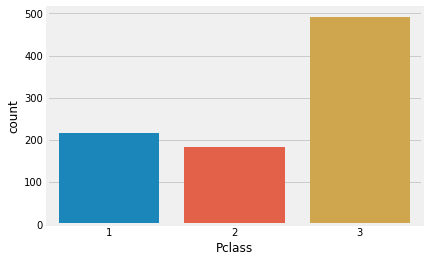

In [109]:
ax = sns.countplot(x="Pclass", data=train1)

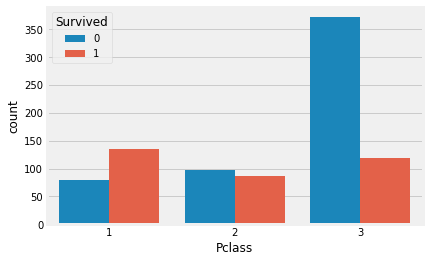

In [110]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train1)

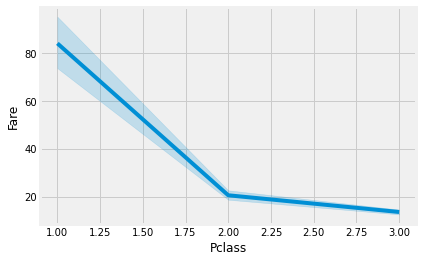

In [111]:
ax = sns.lineplot(x="Pclass", y="Fare", data=train1) # 음영:에러 편차

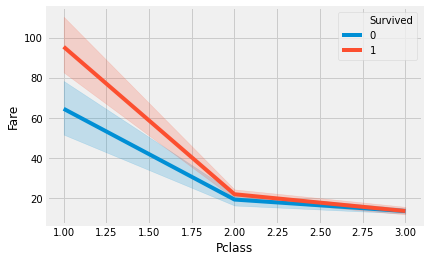

In [112]:
ax = sns.lineplot(x="Pclass", y="Fare", hue="Survived",data=train1)

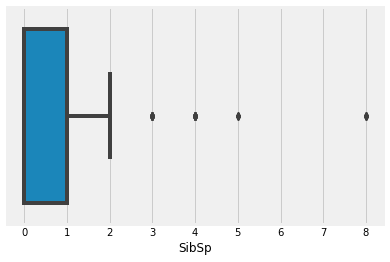

In [113]:
# boxplot : x축 y축이 실수이든 범주이든 상관없이, 다차원 복합데이터용
# 변수 간 또는 범주형 변수 간의 비교를 용이하게하는 방식으로 정량적 데이터 분포
# data의 size를 x축으로 해서 Boxplot을 봅니다
sns.boxplot(x=train1['SibSp'])

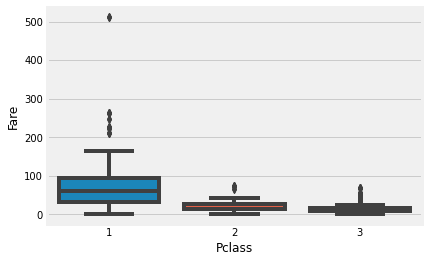

In [114]:
sns.boxplot(x='Pclass', y='Fare', data=train1)

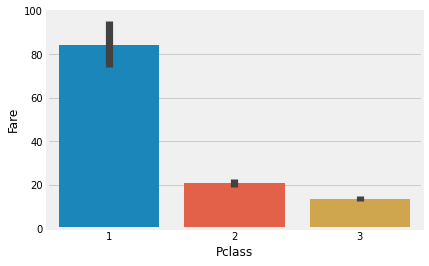

In [115]:
# barplot : 각 사각형의 높이를 가진 숫자 변수에 대한 중심 경향의 추정치
# 오차 막대(까만 줄) : 해당 추정치 주변의 불확실성
sns.barplot("Pclass", "Fare", data=train1)

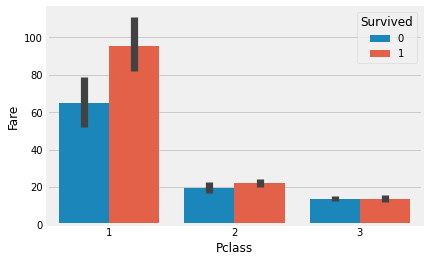

In [116]:
ax = sns.barplot(x="Pclass", y="Fare", hue="Survived", data=train1)

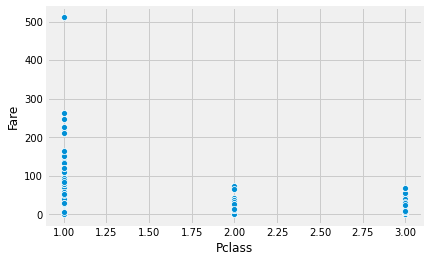

In [117]:
ax = sns.scatterplot(x="Pclass", y="Fare", data=train1)

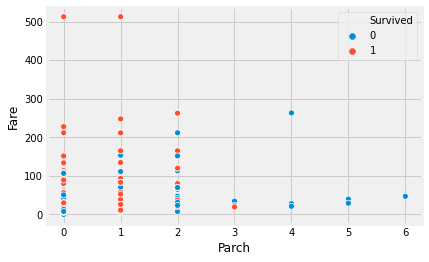

In [118]:
ax = sns.scatterplot(x="Parch", y="Fare", hue="Survived",data=train1)
# 그룹화하여 표시

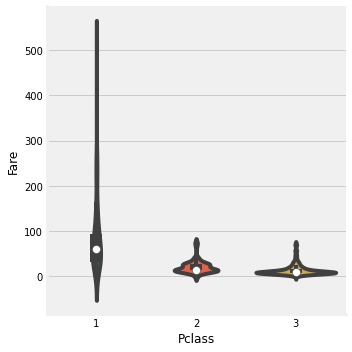

In [119]:
sns.catplot(x="Pclass", y="Fare", kind="violin", data=train1)

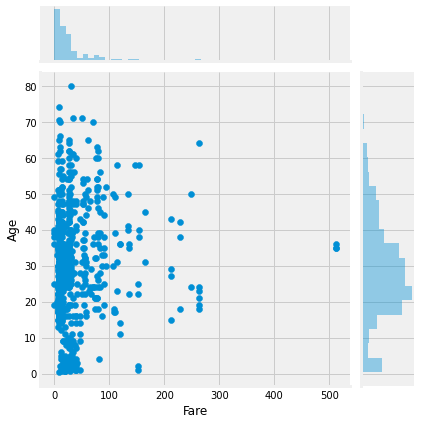

In [120]:
# jointplot : 플롯합한거
sns.jointplot(x="Fare", y="Age", data=train1, kind='scatter')

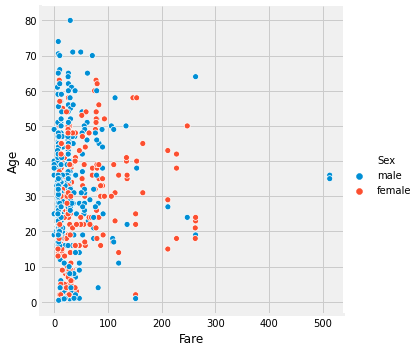

In [121]:
sns.relplot(x="Fare", y="Age", hue="Sex", data=train1)

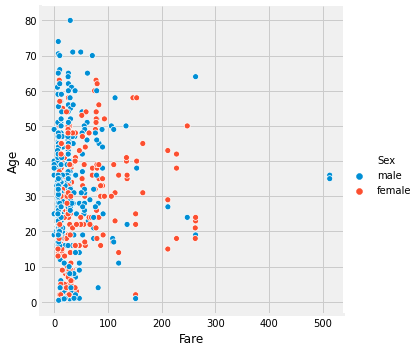

In [122]:
sns.relplot(x="Fare", y="Age", hue="Sex", data=train1)

In [123]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,NewAge,Initial,LastName,total,Top5Age,Gender,NumName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",22.0,Mr,Braund,1,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",38.0,Mrs,Cumings,3,0.0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",26.0,Miss,Heikkinen,4,0.0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",35.0,Mrs,Futrelle,5,0.0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",35.0,Mr,Allen,5,0.0,1,4


In [0]:
train3 = pd.DataFrame()

def chn(a):
    train3[a]= train1[a]

chn('Survived')
chn('Pclass')
chn('Age')
chn('Fare')
chn('Gender')
chn('NumName')

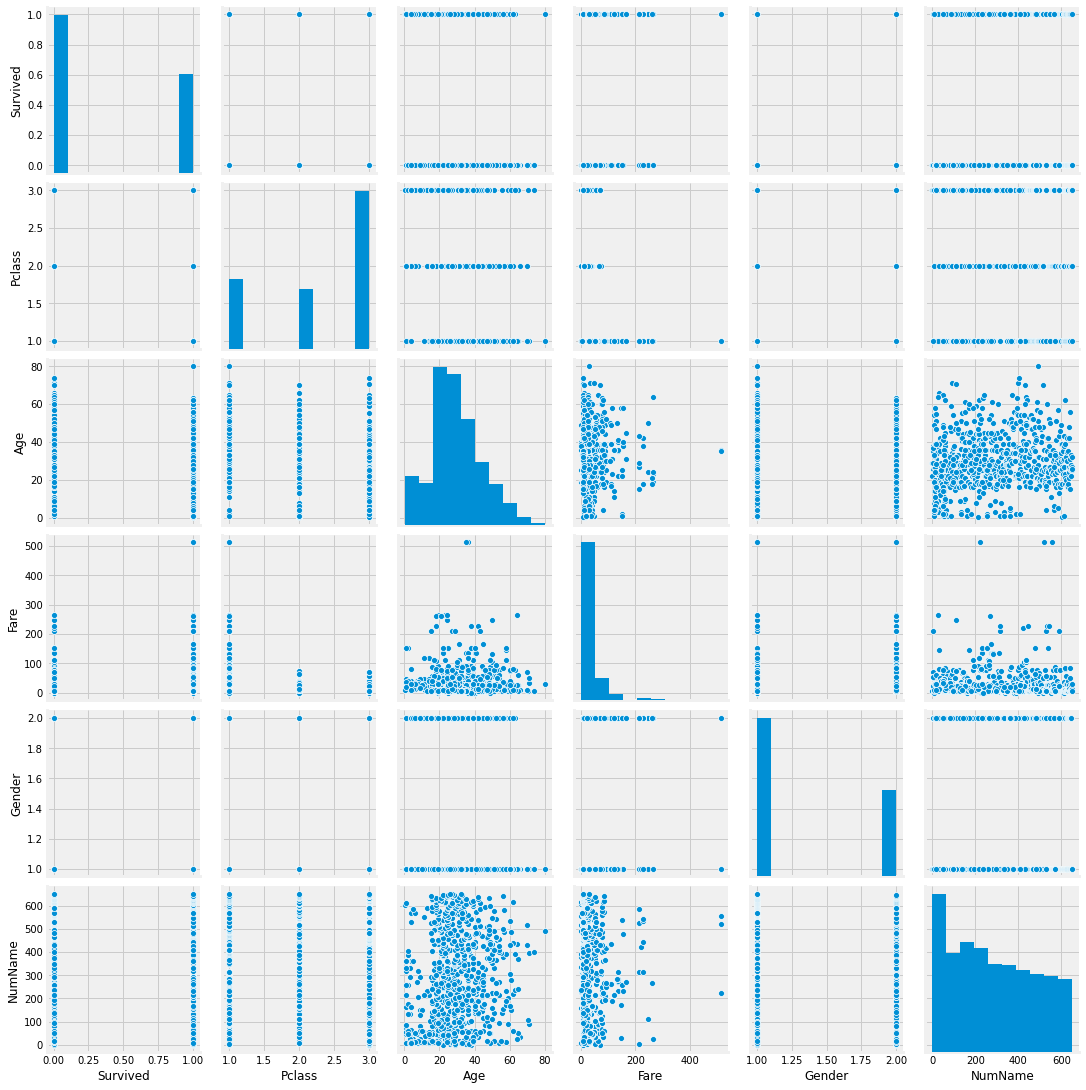

In [125]:
sns.pairplot(train3) # pairplot : 숫자만을 데이터로 받아들이기 때문에 데이터를 바꾸어야 한다

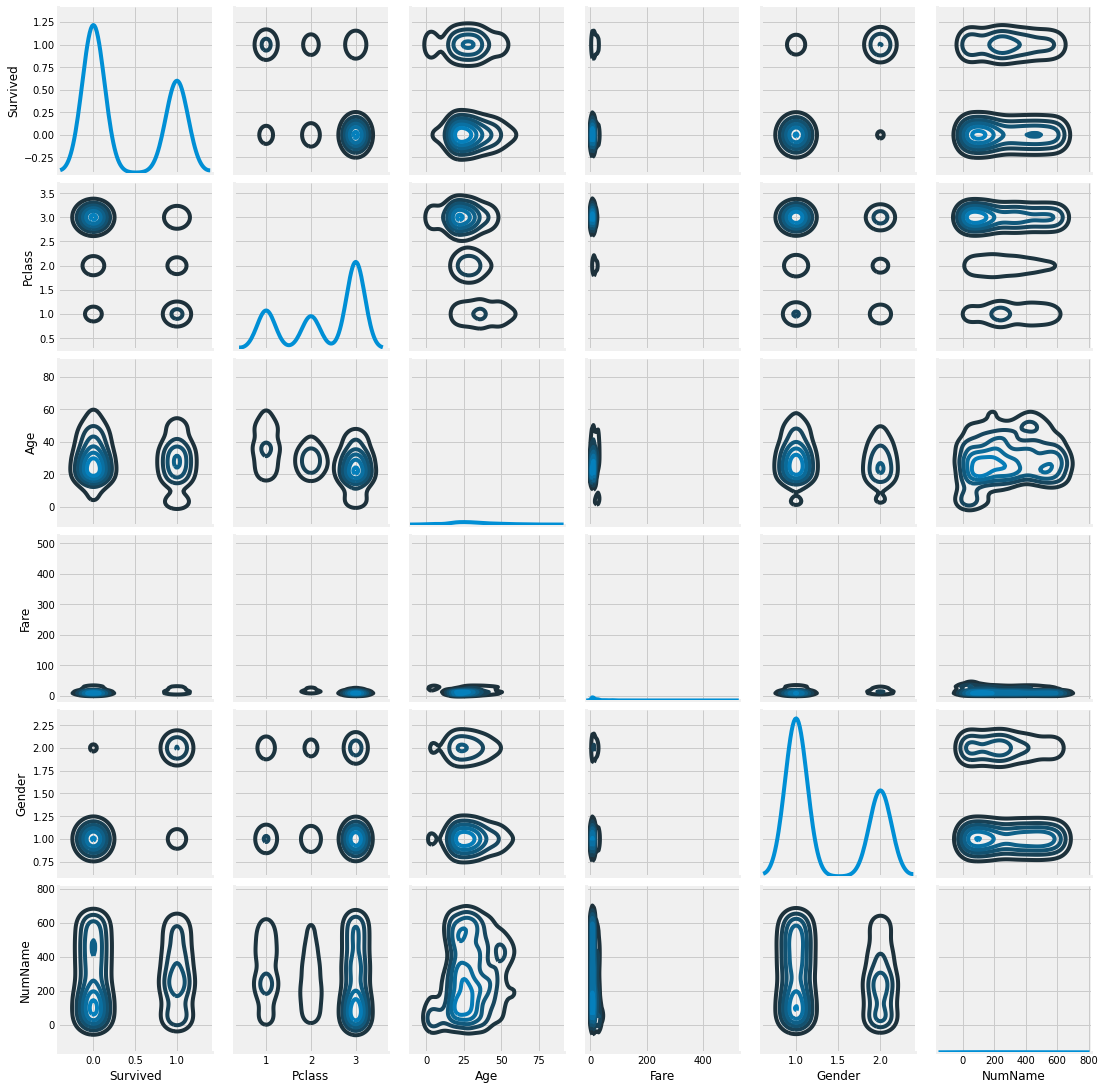

In [128]:
g = sns.PairGrid(train3) # PairGrid: 변수간 상관관계를 보이기위한 정방평의 grid plot
# 대각선과 그 외 어떤 플롯그릴지 아래 두 함수로 정의가능
g.map_diag(sns.kdeplot) # 가운데 그래프에 넣을 플롯
g.map_offdiag(sns.kdeplot, n_levels=6); 

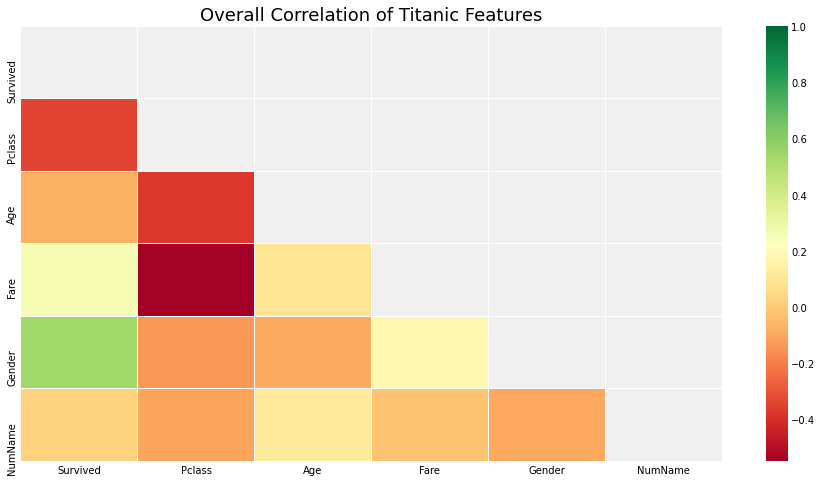

In [131]:
# SNS 코릴레이션
# Co-relation 매트릭스
corr = train3.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # (대각행렬 포함) upper triangle에 대한 인덱스
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
# annot_kws : dict of key, value mappings, optional. Keyword arguments for ax.text when annot is True. 
# size는 폰트사이즈
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20}) 
plt.show()